# Data Matching-Lexical Similarity
Objective: match the correct institution id in the 'FIN_INST' file to the owner of the patent in the 'USPTO_INST' file.

In [72]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt


In [73]:
fin_inst = pd.read_excel(r'/Users/danielnavarro/Documents/DataFoundations_UTSA/FIN_INST.xlsx')
fin_inst.head()

,[ID],INSTITUTION
0,95008,Ball State Univ.
1,95010,Baylor College of Medicine
2,95018,Brigham Young University
3,95023,California Pacific Medical Center Research Ins...
4,95029,Case Western Reserve University


In [8]:
print(fin_inst.isnull().sum())
print(fin_inst.dtypes)

[ID]           0
INSTITUTION    0
dtype: int64
[ID]            int64
INSTITUTION    object
dtype: object


In [7]:
uspto_inst = pd.read_excel(r'/Users/danielnavarro/Documents/DataFoundations_UTSA/USPTO_INST.xlsx')
uspto_inst.head()

,Unnamed: 0,id,type,name_first,name_last,organization,FIN_INST_ID,FIN_INS_INSTITUTION
0,0,00002ded-cef9-4c06-ad0c-0fee8891a8ed,2.0,NaN,NaN,"Butterick Company, Inc.",NaN,NaN
1,1,00002ed6-a81c-4adf-afa3-e91961107dca,3.0,NaN,NaN,Conros Corporation,NaN,NaN
2,2,000055d3-0d65-4d07-8d0a-8939b578b0e1,3.0,NaN,NaN,Chungbuk National University,NaN,NaN
3,3,0000591f-7548-49ee-a4ae-fca3b0c10b1c,3.0,NaN,NaN,TELEVIC CONFERENCE NV,NaN,NaN
4,4,00007585-cd5c-46d6-96ea-09042748a550,3.0,NaN,NaN,ACES INGENIEURGESELLSCHAFT MBH,NaN,NaN


In [10]:
uspto_inst.dtypes

Unnamed: 0               int64
id                      object
type                   float64
name_first              object
name_last               object
organization            object
FIN_INST_ID            float64
FIN_INS_INSTITUTION    float64
dtype: object

In [8]:
df = uspto_inst.drop(columns=uspto_inst.columns[0:2], axis=1)
#df= uspto_inst.drop(columns=uspto_inst.columns[0], axis=1)
df['organization']=df.organization.astype(str)
df.head(50)
#df.info()

,type,name_first,name_last,organization,FIN_INST_ID,FIN_INS_INSTITUTION
0,2.0,NaN,NaN,"Butterick Company, Inc.",NaN,NaN
1,3.0,NaN,NaN,Conros Corporation,NaN,NaN
2,3.0,NaN,NaN,Chungbuk National University,NaN,NaN
3,3.0,NaN,NaN,TELEVIC CONFERENCE NV,NaN,NaN
4,3.0,NaN,NaN,ACES INGENIEURGESELLSCHAFT MBH,NaN,NaN
5,5.0,John,Van Der Greft,nan,NaN,NaN
6,4.0,Robert J.,Compton,nan,NaN,NaN
7,2.0,NaN,NaN,"Arcoplast, Inc.",NaN,NaN
8,5.0,Albert,Lins,nan,NaN,NaN
9,4.0,John Frederick,Herter,nan,NaN,NaN


In [9]:
#Tokenize words
organization = ''.join(df['organization'])
words = word_tokenize(organization)

In [10]:
#Clean Words: lemmatize, remove stopwords, punctuations
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [11]:
lowered = clean_words(df['organization'])

In [12]:
#bag of words
bow = Counter(lowered)


In [13]:
data = pd.DataFrame(bow.items(), columns = ['word','frequency']).sort_values(by='frequency', ascending = False)
data.head(20)

,word,frequency
0,nan,54516
3517,aquafadas,1
3515,konlanbi,1
3514,securlyft,1
3513,bioprofile,1
3512,incinatrol,1
3511,cizion,1
3510,ogga,1
3509,rhodic,1
3508,visonex,1


In [15]:
#bag of words for bigrams
bow2 = Counter(ngrams(lowered,2))

In [16]:
#bag of words for trigrams
bow3 = Counter(ngrams(lowered,3))

In [17]:
# function below cleans the text, lowers, removes numbers, and creates data frames for word counts 

def word_frequency(sentence):
# joins all the sentenses
    sentence =''.join(sentence)
# creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
#creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

In [18]:
data2, data3, data4 = word_frequency(df.organization)

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

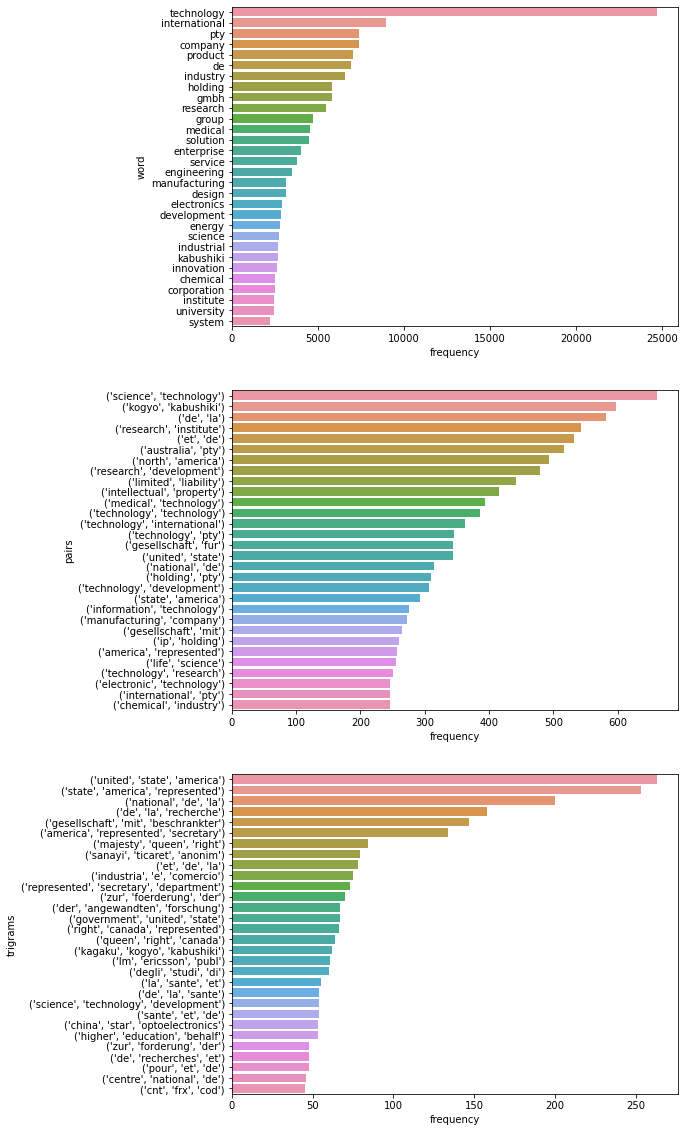

In [19]:
#visualize  words to see how they stack up in terms of frequency.
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

---------
# Calculate difference between words using the Levenshtein Distance
The Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other.

In [43]:
#Formula for levenshtein distance
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [2]:
levenshteinDistance('appleee','aple')

3

In [65]:
from Levenshtein import distance as lev

In [67]:
#calculate Levenshtein distance
lev('California Pacific Medical Center Research Institution', 'California Pacific Medical Center')

21

-----------------------
# FUZZY String Matching

For completion of this project I used the 'get_matches' function to find the 15 most suitable matches of each of the 322 institutions in the FIN_INST file within the USPTO_INST file. After finding the matches I manually selected what I thought was the best option, based on the score of the match and keywords like: board of regents, trustees, etc.

In [1]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [28]:
from fuzzywuzzy import process, fuzz

In [414]:
# Get a list of matches ordered by score
def get_matches(query, choices, limit=15):
    results = process.extract(query,choices,limit=limit)
    return results

In [452]:
get_matches('Puerto Rico ', uspto_inst.organization)

[('NB Jackets de Puerto Rico', 90, 3215),
 ('Government of the Commonwealth of Puerto Rico', 90, 29039),
 ('Commonwealth of Puerto Rico', 90, 31397),
 ('Economic Development Bank For Puerto Rico', 90, 38306),
 ('Technosun Puerto Rico', 90, 65322),
 ('Syntex Puerto Rico, Inc.', 90, 69438),
 ('SB Pharmco Puerto Rico Inc and Neurocrine Biosciences, Inc.', 90, 105633),
 ('SB Pharmco Puerto Rico Inc. of the United States Corporation Company',
  90,
  114287),
 ('Hy-Gain de Puerto Rico, Inc.', 90, 114466),
 ('Besenbruch-Hofmann of Puerto Rico, Inc.', 90, 119669),
 ('TERUMO PUERTO RICO, L.L.C.', 90, 133015),
 ('Orion Research Puerto Rico, Inc.', 90, 156657),
 ('Cyanamid Agricultural de Puerto Rico, Inc.', 90, 167679),
 ('SMITHKLINE BEECHAM PHARMCO PUERTO RICO INCORPORATE', 90, 169778),
 ('SB Pharmaco Puerto Rico Inc.', 90, 179947)]

In [80]:
# If we want only the top score match
def exact_match(query,choices):
    result=process.extractOne(query, choices)
    return result

In [451]:
exact_match('Puerto Rico Science Technology and Research Trust', uspto_inst.organization)

('TIE Communications Research Inc.', 86, 40)

In [64]:
df.join(fin_inst, how = 'left')

,type,name_first,name_last,organization,FIN_INST_ID,FIN_INS_INSTITUTION,[ID],INSTITUTION
0,2.0,NaN,NaN,"Butterick Company, Inc.",NaN,NaN,95008.0,Ball State Univ.
1,3.0,NaN,NaN,Conros Corporation,NaN,NaN,95010.0,Baylor College of Medicine
2,3.0,NaN,NaN,Chungbuk National University,NaN,NaN,95018.0,Brigham Young University
3,3.0,NaN,NaN,TELEVIC CONFERENCE NV,NaN,NaN,95023.0,California Pacific Medical Center Research Ins...
4,3.0,NaN,NaN,ACES INGENIEURGESELLSCHAFT MBH,NaN,NaN,95029.0,Case Western Reserve University
...,...,...,...,...,...,...,...,...
530927,2.0,NaN,NaN,Kelleigh Corporation,NaN,NaN,NaN,NaN
530928,2.0,NaN,NaN,"FIRST GLOBAL XPRESS, LLC",NaN,NaN,NaN,NaN
530929,2.0,NaN,NaN,"LITTLE GIANT LADDER SYSTEMS, LLC",NaN,NaN,NaN,NaN
530930,2.0,NaN,NaN,"ALF Operating Partners, Ltd.",NaN,NaN,NaN,NaN


In [65]:
df.dtypes

type                   float64
name_first              object
name_last               object
organization            object
FIN_INST_ID            float64
FIN_INS_INSTITUTION    float64
dtype: object

In [68]:
from metaphone import doublemetaphone
from enum import Enum

class Threshold(Enum):
    WEAK = 0
    NORMAL = 1
    STRONG = 2

def double_metaphone(value):
    print(doublemetaphone(value))
    return doublemetaphone(value)

#(Primary Key = Primary Key) = Strongest Match
#(Secondary Key = Primary Key) = Normal Match
#(Primary Key = Secondary Key) = Normal Match
#(Alternate Key = Alternate Key) = Minimal Match
def double_metaphone_compare(tuple1,tuple2,threshold):
    if threshold == Threshold.WEAK:
        if tuple1[1] == tuple2[1]:
            return True
    elif threshold == Threshold.NORMAL:
        if tuple1[0] == tuple2[1] or tuple1[1] == tuple2[0]:
            return True
    else:
        if tuple1[0] == tuple2[0]:
            return True
    return False

----
# *EXTRA*
# Python Text Fuzzy Matching | NLP String Matching Pyphonetics | Applied NLP

In [52]:
pip install pyphonetics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 3.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## SOUNDEX

In [53]:
from pyphonetics import Soundex

In [54]:
#Soundex finds the sound of a word: used for semantic similarity 
soundex = Soundex()
soundex.phonetics('two')

'T000'

In [55]:
soundex.sounds_like('two','to')

True

## METAPHONE

In [56]:
from pyphonetics import Metaphone

In [62]:
#Metaphone is more accurate than Soundex
mp = Metaphone()
mp.sounds_like('two','twoo')

True